In [1]:
import numpy as np

In [120]:
N = 10
X_train = np.random.uniform(-5,5,N)
X_test = np.random.uniform(-5,5,100)

In [8]:
def f(x):
  return -np.sin(x/5) + np.cos(x)

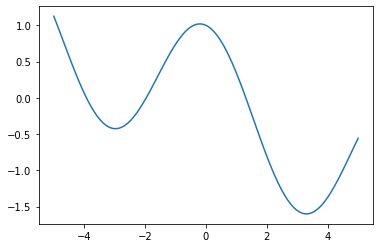

In [125]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100)
plt.plot(x,f(x))

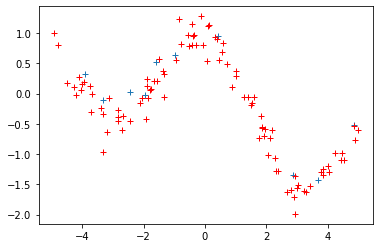

In [124]:
y_train = f(X_train) + np.random.normal(0,.2,N)
y_test = f(X_test) + np.random.normal(0,.2,100)
plt.plot(X_train, y_train, marker='+', linestyle="None")
plt.plot(X_test, y_test, marker='+', color='red', linestyle="None")
#plt.plot(x,f(x))

In [122]:
def L(theta):
  K = len(theta)
  Phi = np.column_stack([X_train**k for k in range(K)])
  return np.sum((y_train - Phi@theta)**2)
def RMSE(theta):
  return np.sqrt(1/N*L(theta))
def L_test(theta):
  K = len(theta)
  Phi = np.column_stack([X_test**k for k in range(K)])
  return np.sum((y_test - Phi@theta)**2)
def RMSE_test(theta):
  return np.sqrt(1/100*L_test(theta))

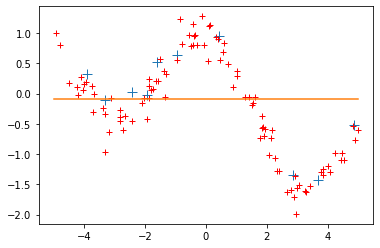

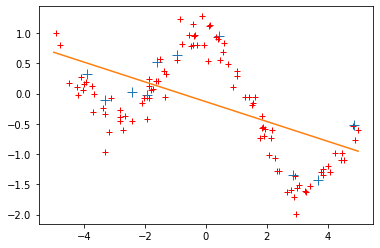

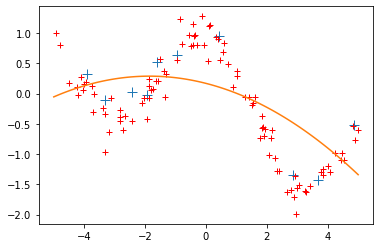

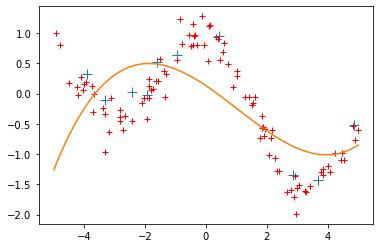

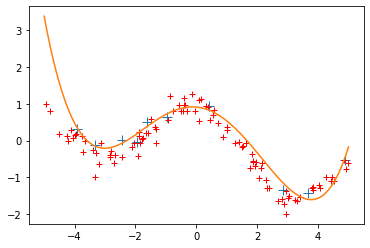

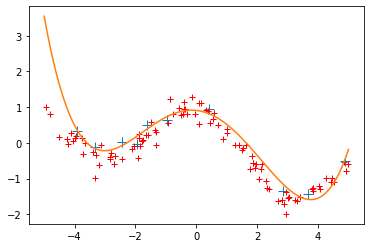

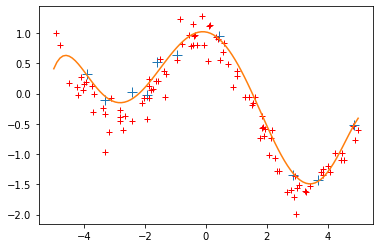

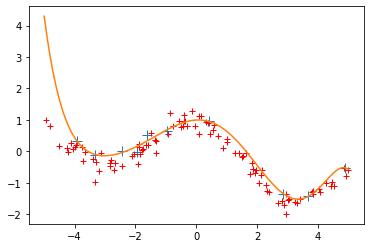

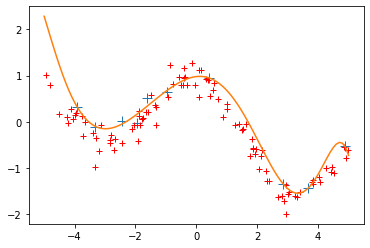

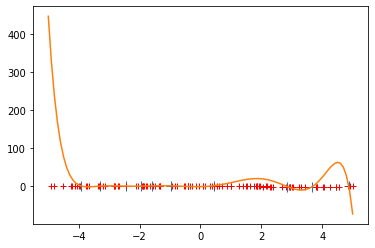

In [138]:
error_train=[]
error_test=[]
for K in range(1,11):
  plt.figure()
  plt.plot(X_train, y_train, marker='+',markersize=10, linestyle="None")
  plt.plot(X_test, y_test, marker='+', color='red', linestyle="None")
  Phi = np.column_stack([X_train**k for k in range(K)])
  theta_star = np.linalg.inv(np.transpose(Phi)@Phi)@np.transpose(Phi)@y_train
  plt.plot(x,theta_star@[x**k for k in range(K)])
  error_train.append(RMSE(theta_star))
  error_test.append(RMSE_test(theta_star))


(0.0, 3.0)

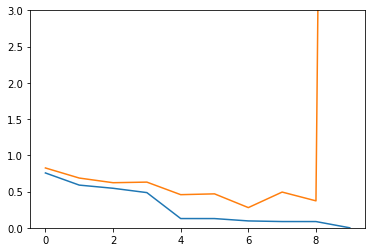

In [139]:
plt.plot(error_train)
plt.plot(error_test)
ax = plt.gca()
ax.set_ylim(0,3)